C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13416\4038876402.py:8: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Sales.csv')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13416\4038876402.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13416\4038876402.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained a

Total Sales: 127492214.56349605


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13416\4038876402.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Sales'].sum()


Monthly Sales:
 Date
2022-04-30    226425.0
Name: Sales, dtype: float64
Sales by City:
 City_name
Bengaluru    4.123100e+04
Delhi        1.273587e+08
HR-NCR       6.155200e+04
Mumbai       3.073600e+04
Name: Sales, dtype: float64
Sales by Product ID:
 Product_id
4.0          96.0
7.0         984.0
12.0        138.0
13.0        734.0
14.0        212.0
            ...  
481120.0    150.0
481197.0    121.0
481206.0    630.0
481428.0    396.0
481576.0     70.0
Name: Sales, Length: 1128, dtype: float64
Correlation between Total Weighted Landing Price and Sales: 0.98
7-Day SMA Forecast for the next period: 121.61
14-Day SMA Forecast for the next period: 121.61


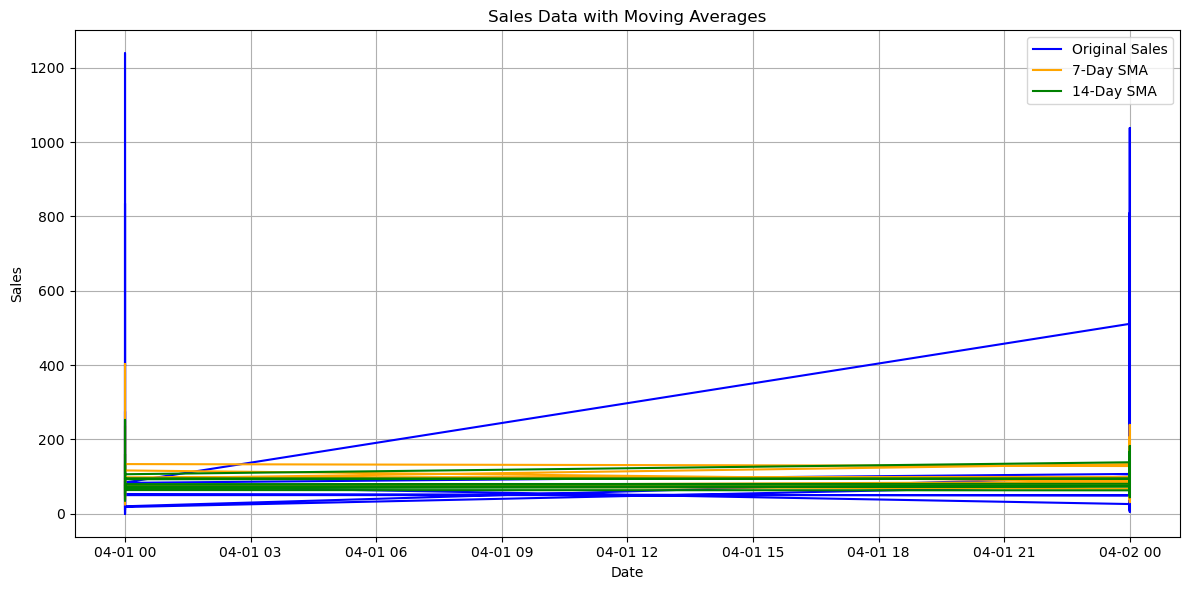

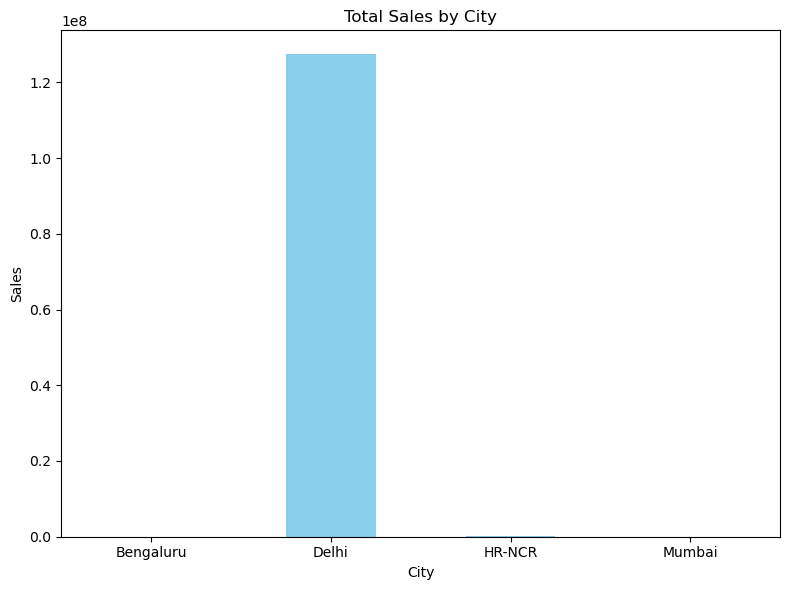

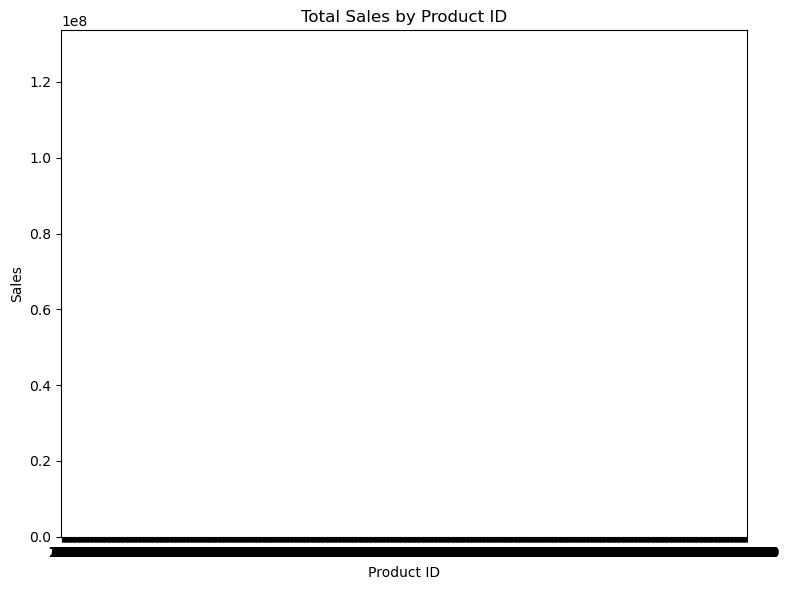

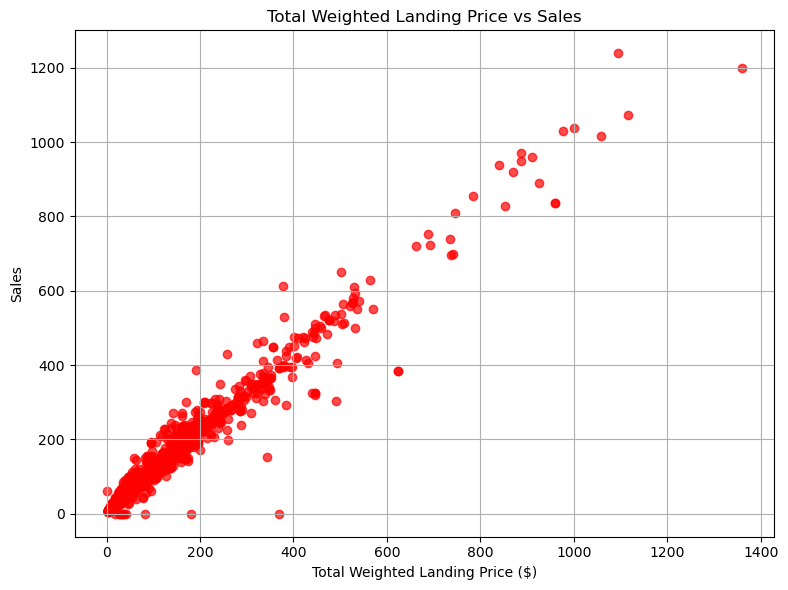

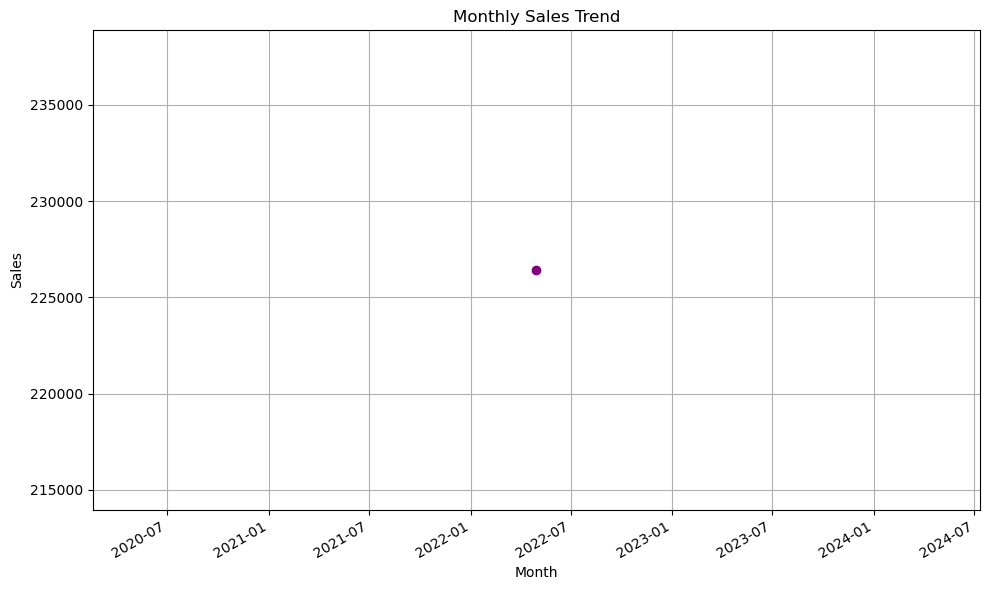

"df.to_csv('new_sales_data_enhanced_with_forecast.csv', index=False)"

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Loading
# Load the enhanced sales data from a CSV file (Replace 'sales_data.csv' with your actual file)
df = pd.read_csv('Sales.csv')

# 2. Data Preprocessing
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing values
# For simplicity, fill missing numerical values with the mean and categorical with mode
for column in ['Procured_quantity', 'Unit_selling_price', 'Total_discount_amount', 'Total_weighted_landing_price']:
    df[column].fillna(df[column].mean(), inplace=True)

for column in ['City_name', 'Product_id']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# 3. Data Analysis

# 3.1 Calculate Total Sales
df['Sales'] = df['Procured_quantity'] * df['Unit_selling_price']
total_sales = df['Sales'].sum()
print(f'Total Sales: {total_sales}')

# 3.2 Group the data by month to get monthly sales
monthly_sales = df.resample('M', on='Date')['Sales'].sum()
print("Monthly Sales:\n", monthly_sales)

# 3.3 Sales by City
sales_by_city = df.groupby('City_name')['Sales'].sum()
print("Sales by City:\n", sales_by_city)

# 3.4 Sales by Product ID
sales_by_product = df.groupby('Product_id')['Sales'].sum()
print("Sales by Product ID:\n", sales_by_product)

# 3.5 Correlation between Total Weighted Landing Price and Sales
correlation = df['Total_weighted_landing_price'].corr(df['Sales'])
print(f'Correlation between Total Weighted Landing Price and Sales: {correlation:.2f}')

# 4. Forecasting using Simple Moving Averages (SMA)

# 4.1 Calculate a 7-day moving average
df['SMA_7'] = df['Sales'].rolling(window=7).mean()

# 4.2 Calculate a 14-day moving average
df['SMA_14'] = df['Sales'].rolling(window=14).mean()

# 4.3 Forecast future sales based on the last SMA value
future_sales_forecast_7 = df['SMA_7'].iloc[-1]
future_sales_forecast_14 = df['SMA_14'].iloc[-1]
print(f'7-Day SMA Forecast for the next period: {future_sales_forecast_7:.2f}')
print(f'14-Day SMA Forecast for the next period: {future_sales_forecast_14:.2f}')

# 5. Visualization

# 5.1 Plot the original sales data and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Original Sales', color='blue')
plt.plot(df['Date'], df['SMA_7'], label='7-Day SMA', color='orange')
plt.plot(df['Date'], df['SMA_14'], label='14-Day SMA', color='green')
plt.title('Sales Data with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5.2 Bar Chart for Sales by City
plt.figure(figsize=(8, 6))
sales_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5.3 Bar Chart for Sales by Product ID
plt.figure(figsize=(8, 6))
sales_by_product.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5.4 Scatter Plot for Total Weighted Landing Price vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Total_weighted_landing_price'], df['Sales'], alpha=0.7, color='red')
plt.title('Total Weighted Landing Price vs Sales')
plt.xlabel('Total Weighted Landing Price ($)')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5.5 Plot Monthly Sales Trend
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Exporting the Results
# Save the DataFrame with moving averages to a new CSV file
'''df.to_csv('new_sales_data_enhanced_with_forecast.csv', index=False)'''
